#    Week 8 Lecture: Biomolecular Simulation (Part I)

###  Samik Bose, Postdoctoral Research Associate, DicksonLab

![BM](https://wires.onlinelibrary.wiley.com/cms/asset/7f03c765-f4c2-435f-b478-7db6d2ce87ad/wcms1393-toc-0001-m.jpg)


- **Advancement and current status of molecular simulation.**

- **Topology and Force Fields.**

- **Idea and introduction to OpenMM.**

# How it started?

### 1964  : The first known MD simulation is performed in a **computer** by A. Rahman. ###

- *864 Argon atoms interacting via LJ potential.*
- *'Computer': 48-bit system with a RAM: ~1.5 MB and 10 KiloFLOPS.*


### 1972 : Simulation of 216 water molecules in a periodic box. ###

- *All the bonded and non-bonded potentials and their parameters were derived mathematically.*
- *A few picoseconds of simulation can only be carried away.*




### 1970-90s : Concept of force fields and its systematic development. 

- *An equation for the potential energy and a set of **transferable** parameters for each molecule.* 

- *Force fields such as OPLS, AMBER, CHARMM, GROMOS etc are developed.*

- **Opens the door for a theoretical, physics-based understanding of complex bio-systems.**


# How is it going?

### Since 2000: A steady growth and expanding the horizon each day!

**2013: Nobel prize in chemistry in for ['the development of multiscale models for complex chemical systems"](https://www.nobelprize.org/prizes/chemistry/2013/summary/), which is a closely allied field of molecular simulation. [Biomolecular simulation is a subset of multiscale modeling]**

**2014: All atom simulation of solvated HIV-1 capsid structure (~ 64 million atoms, ~ 1 $\mu$s)**

![BM](https://static-content.springer.com/esm/art%3A10.1038%2Fnature12162/MediaObjects/41586_2013_BFnature12162_MOESM63_ESM.mov)

#### Prof. Feig and co-workers developed a model for bacterial cytoplasm ( >1 million atoms) and ran ~20 ns of simulations to understabd the structure and interactions. Cool figures and videos can be found [here](https://elifesciences.org/articles/19274/figures#content).

## Biomolecular Simulations leading the way for drug discovery and medical science

- **2020: Durrant and coworkers performed an influenza virus simulation and proposed possible mechanism of drugs. (~164 million atom system)**

![bm](Amaro_influenza.png)

###  MD simulation of SARS-COV2 Viral envelope with 305 million atoms.

- **A. The all atom model of SARS-COV2 (from simulation).** 
- **B & C. The glycan shield of the spike protein and its role in modulating the infectivity of the virus.**
- **D. The characterization of the flexible interactions between the spike and the human ACE2 receptor.**

![bm](sars-cov2_model.png)


# Exponential growth in technology!


###  Humanity landed on moon with 4 KB RAM and 2 MHz CPU.



###  Supercomputers of today: 
    - TBs of RAM, 
    - PBs of diskspace, 
    - $>$ 1000s of processors and GPUs,  
    - $>$ TeraFlops to PetaFlops of speed.
    
- [Anton](https://en.wikipedia.org/wiki/Anton_(computer)) is a massively parallel and specially built to run long time and length scale MD simulations.  
    
- [Anton2](https://ieeexplore.ieee.org/document/7012191) can run 85 $\mu$s/day for ~24000 benchmark system which is claimed to be 180 times faster than any other academic supercomputer.

# Development in softwares/algorithms as well


**Converting to GPU-based code architecture**

- In 2007, NVIDIA introduced GPU cards to develop parallel programs in high-level API named CUDA. 

- The scientific community converted the existing simulation packages in CUDA enabled versions which increased the computational efficiency.




**Incorporating Ewald summation in calculation of long-range electrostatics.**

- Instead of calculating all possibile long-range one-to-one electrostatics interaction, a particle mesh ewald type approach calculates the interaction energies in Fourier space with much less computation and faster convergence.

**Enhanced sampling methods**

- One of the most discussed drawback of MD simulation is the sampling problem. This is due to rough energy landscapes, with many local minima separated by high-energy barriers, which govern the biomolecular motion.


- Enhanced sampling algorithms such as replica exchange molecular dynamics, metadynamics, simulated annealing, weighted ensemble have accelarated the conformtional search, both at equlibria and at non-equlibrium states.

[Our group has been designing weighted ensemble based methods and softwares to study protein-ligand interactions.]


# Running an MD simulation:


## Initial starting structures of biomolecules

- X-ray crsytal srtuctures from Protein data bank (https://www.rcsb.org)

## MD engines to solve the equation of motion:

- GROMACS
- NAMD
- AMBER
- OpenMM
- Tinker
- LAMMPS
- ...




## Force fields to define the interaction potentials between atoms:

- [CHARMM36](https://www.charmm.org) [Chemistry at HARvard Macromolecular Mechanics]
- [AMBER20](https://ambermd.org) [Assisted Model Building with Energy Refinement]
- [OPLS-AA/M](http://zarbi.chem.yale.edu/oplsaam.html)  [Optimized Potentials for Liquid Simulations]
- [GROMOS](http://www.gromos.net) [GROningen MOlecular Simulation]
- ...

#### We will use OpenMM MD engine for the next two weeks.

#### Installing Softwares:

```  conda install -c conda-forge openmm ```

``` pip install mdtraj  ```

``` pip install nglview ```





## Topology and Force field

- Topology in biomolecular simulations consists of a group of chains, where a chain consists of multiple residues and every residue contains a set of atoms.

- These atoms interacts with each other by various bonded and non-bonded poetntials. The potential and its parameter set is known as force field.

### To run a simulation in OpenMM, you would require a topology file (contains the connectivity information) and a force field file (contains the parameters of the force field).


- Example of force field equation (CHARMM):


![ab](CHARMM_eqn.PNG)



## IPython utility to learn more about each OpenMM object and its functions/attributes

In [57]:
?

### Please check if any of these import commands produce error in your machines

In [1]:
import matplotlib.pyplot as plt
import mdtraj
import nglview
import numpy as np
from openmm import *
from openmm.app import *
from openmm.unit import *

## Concept of Units and constants in OpenMM

In [2]:
time = 10 * picosecond  # 10 * picoseconds will also work.
print("Unit of variable time:", time.unit)
print("time:", time)
print("time [s]:", time / second)
print("time [s]:", time / seconds)
print("time [fs]:", time.value_in_unit(femtosecond))
print("time:", time.in_units_of(femtosecond))
# OpenMM also knows a few important constants.
print("Boltzmann's constant:", BOLTZMANN_CONSTANT_kB)
print("Avogadro's constant:", AVOGADRO_CONSTANT_NA)


Unit of variable time: picosecond
time: 10 ps
time [s]: 1e-11
time [s]: 1e-11
time [fs]: 10000.0
time: 10000.0 fs
Boltzmann's constant: 1.380649e-23 J/K
Avogadro's constant: 6.02214076e+23 /mol


# Lets define a topology of a water molecule:


In [26]:
topology = Topology()
chain = topology.addChain()
residue = topology.addResidue("water", chain)
element_O = Element.getByAtomicNumber(8)
element_H = Element.getByAtomicNumber(1)
atom0 = topology.addAtom("O", element_O, residue)
atom1 = topology.addAtom("H", element_H, residue)
atom2 = topology.addAtom("H", element_H, residue)
topology.addBond(atom0, atom1)
topology.addBond(atom0, atom2)

In [27]:
chain?

In [18]:
topology?

```
In [7]: topology?
Type:           Topology
String form:    <Topology; 1 chains, 1 residues, 3 atoms, 2 bonds>
File:           ~/opt/anaconda3/envs/ml4md/lib/python3.8/site-packages/openmm/app/topology.py
Docstring:     
Topology stores the topological information about a system.

The structure of a Topology object is similar to that of a PDB file.  It consists of a set of Chains
(often but not always corresponding to polymer chains).  Each Chain contains a set of Residues,
and each Residue contains a set of Atoms.  In addition, the Topology stores a list of which atom
pairs are bonded to each other, and the dimensions of the crystallographic unit cell.

Atom and residue names should follow the PDB 3.0 nomenclature for all molecules for which one exists.

```

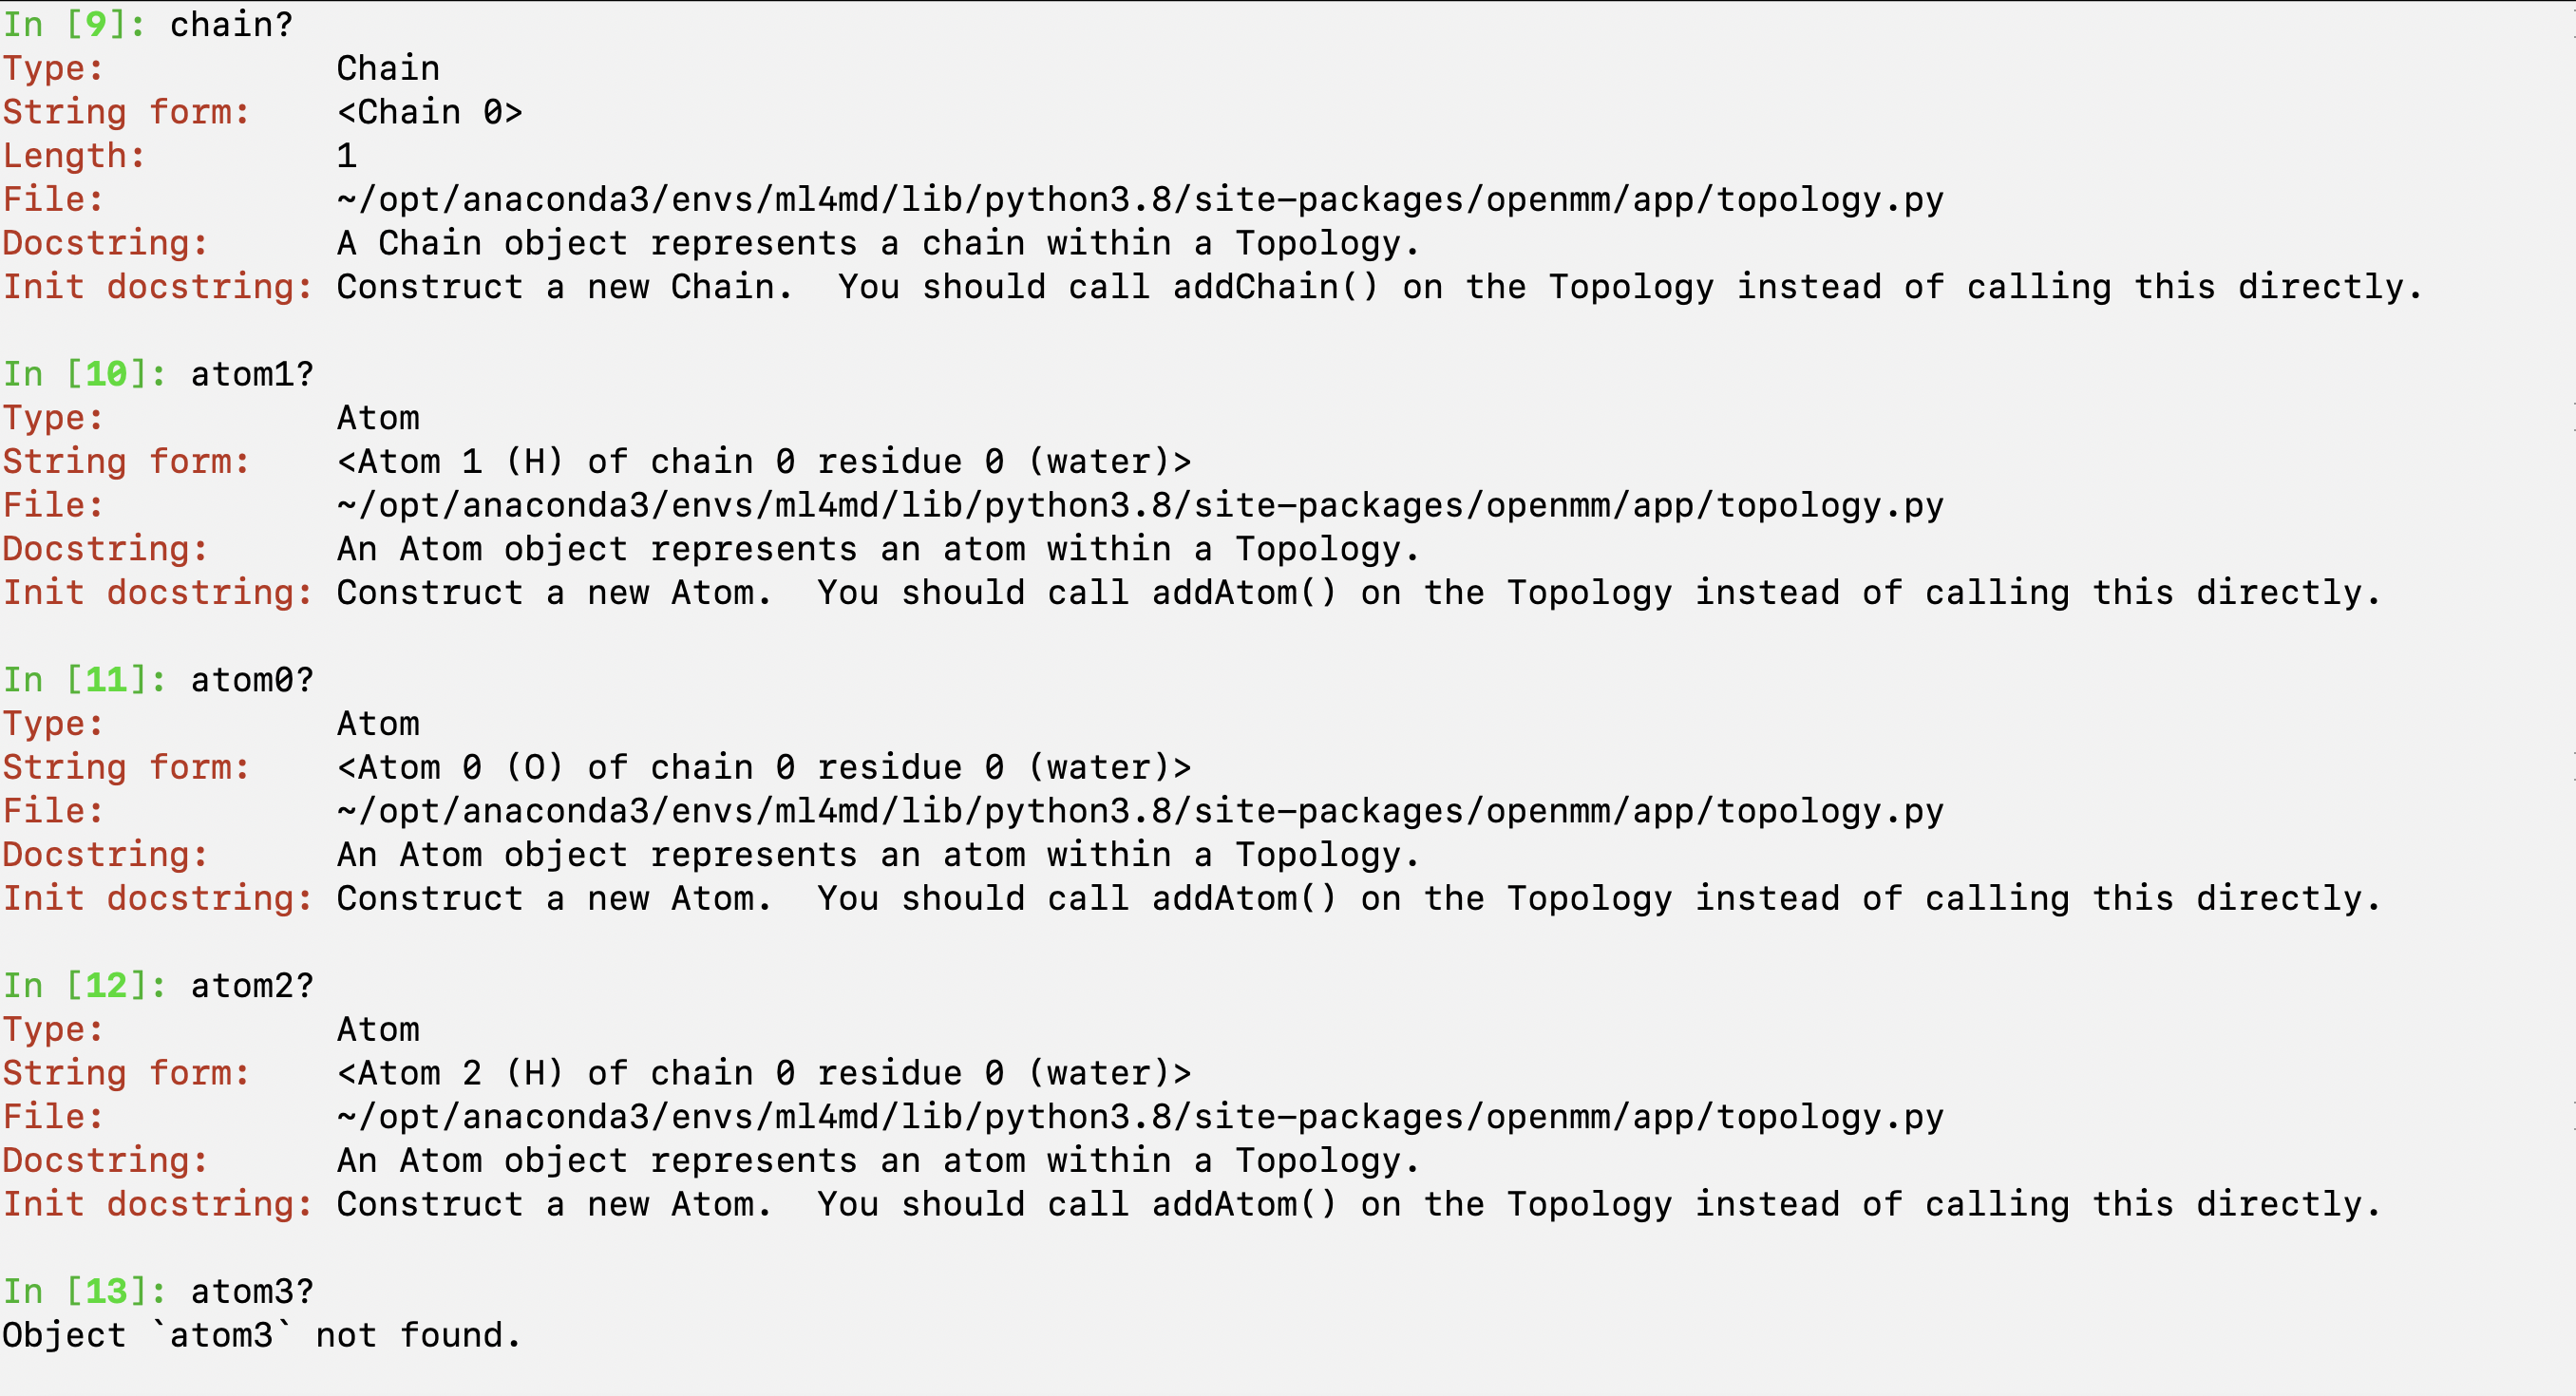

### Printing the details of topology:

- The topology documentation of OpenMM is [here](http://docs.openmm.org/latest/api-python/generated/openmm.app.topology.Topology.html#openmm.app.topology.Topology).

- Detailed OpenMM Python API can be found [here](http://docs.openmm.org/latest/api-python/index.html). **[Important for the labs!!]**


In [28]:
print(topology)
print("Number of atoms:", topology.getNumAtoms())
print("Periodic boundaries:", topology.getUnitCellDimensions())
for iatom, atom in enumerate(topology.atoms()):
     # The following-line would just print a dictionary
     # with all attributes, useful to explore undocumented
     # attributes.
     # print(vars(atom))
     print(
         "Name and mass of atom {}: {}, {}".format(iatom, atom.name, atom.element.mass))


<Topology; 1 chains, 1 residues, 3 atoms, 2 bonds>
Number of atoms: 3
Periodic boundaries: None
Name and mass of atom 0: O, 15.99943 Da
Name and mass of atom 1: H, 1.007947 Da
Name and mass of atom 2: H, 1.007947 Da


# Set up the simulation:

### This part consists of a few steps:

- Select the TIP3P-FB force field for water. The file tip3pfb.xml is there in the ``` app/data/amber14/ ``` sub-directory. It's contents can also be viewed in this [link online](https://github.com/openmm/openmm/blob/master/wrappers/python/openmm/app/data/amber14/tip3pfb.xml).

- Define a system, which is essentially an object implementing the selected force field for our topology. This object can compute energies and forces.

- Define an integrator, which implements a molecular dynamics algorithm, in this case the Verlet algorithm sampling the NVE ensemble. 

- Define a simulation, which has the following responsibilities:

    - keep track of the current state (atomic positions etc.),

    - decide which implementation to use (CPU versus GPU)

    - drive the integrator and

    - write output files (reporters).

*Note: This simple example does not write any output yet. The initial positions are provided as a NumPy array, multiplied by a unit. Each row in the array contains the X, Y and Z coordinates of one atomic nucleus, in the same order as the atoms in the topology. Normally, these initial positions are loaded from a PDB file.*

In [29]:
# a. Select the TIP3P-FB force field.
forcefield = ForceField("amber14/tip3pfb.xml")
 
 # b. Create an object to compute energies and forces for our topology.
system = forcefield.createSystem(topology, nonbondedCutoff=1 * nanometer)
 
 # c. Definition an integrator, mandatory.
integrator = VerletIntegrator(1 * femtoseconds)

 # d. A simulation object in OpenMM combines topology, system and integrator.
simulation = Simulation(topology, system, integrator)

simulation.context.setPositions(np.array([
             [0.0, 0.0, 0.0],
             [0.0, 0.0, 1.0],
             [0.0, 1.0, 0.0],])*angstroms)

![openmm forcefield object](https://raw.githubusercontent.com/ADicksonLab/ml4md-jb/main/Week-08/Screen%20Shot%202022-03-01%20at%209.25.05%20AM.png)

![openmm system object](https://raw.githubusercontent.com/ADicksonLab/ml4md-jb/main/Week-08/Screen%20Shot%202022-03-01%20at%209.25.53%20AM.png)

## Lets take a look at the forces from the system:


In [30]:
# Loop over all contributions to the force evaluation.
# Note that not all terms are real force-field contributions.
# The last one zeros to center-of-mass momentum at every step.
for force in system.getForces():
    print(force)
print()
# The force field contains two harmonic bond terms,
# with the same parameters.
force_bond = system.getForce(0)
for ibond in range(force_bond.getNumBonds()):
    print(force_bond.getBondParameters(ibond))
    print()


<openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x7ffdf1a1cde0> >
<openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x7ffdf1a1c840> >
<openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x7ffdf1a1c150> >
<openmm.openmm.CMMotionRemover; proxy of <Swig Object of type 'OpenMM::CMMotionRemover *' at 0x7ffdf1a1c570> >

[0, 1, Quantity(value=0.101181082494, unit=nanometer), Quantity(value=462750.4, unit=kilojoule/(nanometer**2*mole))]

[0, 2, Quantity(value=0.101181082494, unit=nanometer), Quantity(value=462750.4, unit=kilojoule/(nanometer**2*mole))]



## Minimize the energy

This part is split up in a few steps:

- Before minimizing, compute and print the energy of the initial state.

- Minimize the energy. This is a black-box procedure, using the L-BFGS algorithm. 

- Compute and print the energy of the final state.

In [31]:
# a. Print the energy before minimizing.
state0 = simulation.context.getState(getEnergy=True)
print(state0.getPotentialEnergy())

# b. Minimize the energy.
simulation.minimizeEnergy()

# c. Print the energy afterwards.
state1 = simulation.context.getState(getEnergy=True)
print(state1.getPotentialEnergy())

42.62383270263672 kJ/mol
1.2486177183745895e-05 kJ/mol


## How to access the final geometry?

- A Simulation object has a context attribute. Context has the information of the current simulation state of the system. The Context class is documented [here](http://docs.openmm.org/latest/api-python/generated/openmm.openmm.Context.html#openmm.openmm.Context).

- The ``` simulation.context.getState ``` method retrieves a State object with results for the final geometry of the water molecule. The State class is documented [here](http://docs.openmm.org/latest/api-python/generated/openmm.openmm.State.html#openmm.openmm.State).


In [32]:
state = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)
print("Potential energy: ", state.getPotentialEnergy())
print()
print("Atomic positions")
print(state.getPositions(asNumpy=True))
print()
print("Forces")
print(state.getForces(asNumpy=True))
print()


Potential energy:  1.2486177183745895e-05 kJ/mol

Atomic positions
[[ 0.          0.00534427  0.00534427]
 [ 0.         -0.01060476  0.1052605 ]
 [ 0.          0.1052605  -0.01060476]] nm

Forces
[[ 0.          1.66109741  1.66504562]
 [ 0.         -1.40527272 -0.25922933]
 [ 0.         -0.25582469 -1.40581632]] kJ/(nm mol)



## Write the minimized structure to a PDB for visualization

- Store the positions in a numpy array.
- Use the OpenMM function ``` PDBFile.writefile ``` to write to a PDB.
- Visualize.

In [33]:
pos = state.getPositions(asNumpy=True)

with open("water.pdb", "w") as outfile:
    PDBFile.writeFile(topology, pos, outfile)
# Visualize
view_minim = nglview.show_mdtraj(mdtraj.load("water.pdb"))
view_minim

NGLWidget()

# Running a test simulation of a 'small' protein

- Copy the ``` input.pdb ``` file from the examples folder of your openmm installation. If you installed openmm via conda then the path should look like ``` [anaconda_folder_path]/pkgs/openmm-7.7.0-[your_version]/share/openmm/examples ```. This contains Villin N68H protein in water.


- Check that ``` amber14-all.xml ``` file exists in you openmm data folder. If you installed openmm via conda then the path should look like ``` [anaconda_folder_path]/pkgs/openmm-7.7.0-[your_version]/lib/python3.8/site-packages/openmm/app/data/ ```.


In [34]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout

# loading the input pdb.
pdb = PDBFile('input.pdb')

# defining the forcefield 
forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')

# creating the system using the forcefield and pdb topology
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
        nonbondedCutoff=1*nanometer, constraints=HBonds)

# defining the integrator
integrator = LangevinMiddleIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)

# creating the simulation object
simulation = Simulation(pdb.topology, system, integrator)

# setting the initial positions to pdb positions
simulation.context.setPositions(pdb.positions)

# energy before minimization
state0 = simulation.context.getState(getEnergy=True)
print(state0.getPotentialEnergy())

# b. Minimize the energy.
simulation.minimizeEnergy()

# c. Print the energy afterwards.
state1 = simulation.context.getState(getEnergy=True)
print(state1.getPotentialEnergy())

# defining a PDB reporter which will have the trajectory
simulation.reporters.append(PDBReporter('output.pdb', 100))

# printing the PE and Temp to screen
simulation.reporters.append(StateDataReporter(stdout, 100, step=True,
        potentialEnergy=True, temperature=True))

# write to a file for plotting
simulation.reporters.append(StateDataReporter("scalars.csv", 10, step=True, time=True,
                                              potentialEnergy=True, totalEnergy=True, temperature=True))
# Lets go!!!
simulation.step(10000)


-114904.49843246874 kJ/mol
-166742.68593246874 kJ/mol
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,-162773.56093246874,54.78739518866022
200,-159591.18593246874,99.58547372125051
300,-156610.62343246874,136.08054854029612
400,-154472.87343246874,167.6564799298149
500,-152723.52968246874,192.7584070693534
600,-150952.62343246874,207.2573479524575
700,-149776.62343246874,227.93586275999138
800,-148677.68593246874,240.6587540719194
900,-147584.56093246874,248.25857178586935
1000,-146541.49843246874,251.64869784525408
1100,-146217.99843246874,261.9102864192445
1200,-145405.87343246874,265.68705042205954
1300,-145086.18593246874,272.2767041056566
1400,-144674.06093246874,280.0013143955792
1500,-143459.12343246874,275.8539763589534
1600,-143344.49843246874,285.3183916273659
1700,-142934.31093246874,288.77443220330275
1800,-142564.37343246874,286.1498077661399
1900,-142207.34218246874,289.338936965431
2000,-142047.21718246874,293.5557469957846
2100,-142087.56093246874,295.225692

In [13]:
view = nglview.show_mdtraj(mdtraj.load("output.pdb"))
view

NGLWidget(max_frame=99)